In [102]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import glob
from PIL import Image

In [103]:
image = np.empty((0,3,50,50), dtype=np.uint8)
result = np.empty((0,2), dtype=np.uint8)

list = glob.glob('./work/dataset/plants/*')
for i in list:
    im_reading = np.array( Image.open(i).resize((50,50)))
    im_reading = im_reading.transpose(2,0,1)
    image = np.append(image, [im_reading], axis=0)
    result = np.append(result, np.array([[1,0]]), axis=0)
    
list = glob.glob('./work/dataset/flowers/*')
for i in list:
    im_reading = np.array( Image.open(i).resize((50,50)))
    im_reading = im_reading.transpose(2,0,1)
    image = np.append(image, [im_reading], axis=0)
    result = np.append(result, np.array([[0,1]]), axis=0)

(6, 3, 50, 50)
[1 0]


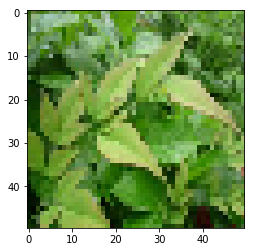

In [104]:
number = 1
print(image.shape)
plt.imshow( image[number].transpose(1,2,0) )
print(result[number])

In [105]:
from sklearn.cross_validation import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(image,result, test_size=0.10, random_state=10)

In [106]:
model = Sequential()
model.add(Conv2D(96, 3, 3, border_mode="same", activation="relu" ,input_shape=(3, 50, 50) ))
model.add(Conv2D(96, 3, 3, border_mode="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), dim_ordering='th'))
model.add(Conv2D(96, 3, 3, border_mode="same", activation="relu"))
model.add(Conv2D(96, 3, 3, border_mode="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), dim_ordering='th'))
model.add(Conv2D(96, 3, 3, border_mode="same", activation="relu"))
model.add(Conv2D(96, 3, 3, border_mode="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), dim_ordering='th'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("relu"))
model.add(Dense(2))
model.add(Activation("sigmoid"))
#model.summary()
model.compile(loss='binary_crossentropy', optimizer="adadelta", metrics=['accuracy'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu", input_shape=(3, 50, 50..., padding="same")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu", padding="same")`
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Ker

In [107]:
hist = model.fit(data_train, labels_train, nb_epoch=20, batch_size=32, validation_data=(data_test, labels_test))

/opt/conda/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 5 samples, validate on 1 samples
Epoch 1/20
5/5 [==============================] - 2s 479ms/step - loss: 5.2476 - acc: 0.5000 - val_loss: 5.1690e-07 - val_acc: 1.0000
Epoch 2/20
5/5 [==============================] - 0s 48ms/step - loss: 8.0063 - acc: 0.5000 - val_loss: 5.3675e-07 - val_acc: 1.0000
Epoch 3/20
5/5 [==============================] - 0s 25ms/step - loss: 8.0063 - acc: 0.5000 - val_loss: 5.3675e-07 - val_acc: 1.0000
Epoch 4/20
5/5 [==============================] - 0s 34ms/step - loss: 9.6181 - acc: 0.4000 - val_loss: 5.3675e-07 - val_acc: 1.0000
Epoch 5/20
5/5 [==============================] - 1s 269ms/step - loss: 6.5804 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 6/20
5/5 [==============================] - 1s 224ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 7/20
5/5 [==============================] - 1s 107ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 8/20
5/5 [===================

In [108]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

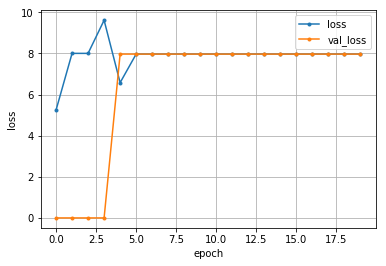

In [109]:
nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss, marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()